In [151]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt  

In [152]:
digist = datasets.load_digits()

In [153]:
X = digist.data
y = digist.target

In [154]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [155]:
from sklearn.cluster import KMeans

In [156]:
nb_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertias = []
for n in nb_clusters:
  km = KMeans(n_clusters=n)
  km.fit(X)
  inertias.append(km.inertia_)
inertias

[1914619.617550103,
 1730182.2600869092,
 1609559.5518465748,
 1497601.9862230495,
 1415478.655862513,
 1334766.428124134,
 1264975.838626755,
 1202362.1610083228,
 1165265.193005922]

In [157]:
from sklearn.cluster import DBSCAN

In [158]:
dbs = DBSCAN(eps=21)
Yp_dbs = dbs.fit_predict(X)

In [159]:
from sklearn.cluster import SpectralClustering

In [160]:
sc = SpectralClustering(n_clusters=9, affinity='nearest_neighbors')
Ys = sc.fit_predict(X)

In [161]:
from sklearn.cluster import AgglomerativeClustering

In [162]:
#complete linkage
ac = AgglomerativeClustering(n_clusters=9, linkage='complete')
Y_ac = ac.fit_predict(X)

##評分結果

In [163]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score
from sklearn.metrics import completeness_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import homogeneity_score

Kmean

In [164]:
avg_silhouettes = []
for n in nb_clusters:
  km = KMeans(n_clusters=n)
  y_km = km.fit_predict(X)
  avg_silhouettes.append(silhouette_score(X, y_km))

In [165]:
avg_silhouettes

[0.11832841100655983,
 0.12650078210066507,
 0.12801530390921514,
 0.13602996477728693,
 0.15156122535780586,
 0.16350066561832777,
 0.17854858359928963,
 0.18904172432609262,
 0.18241804534826836]

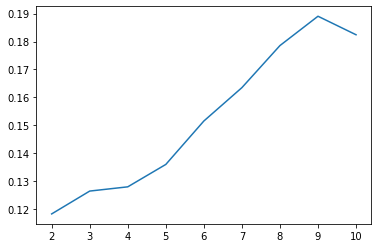

In [166]:
plt.plot(nb_clusters, avg_silhouettes) 

In [167]:
ch_sc = []
for n in nb_clusters:
  km = KMeans(n_clusters=n)
  y_km = km.fit_predict(X)
  ch_sc.append(calinski_harabaz_score(X, y_km))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz

In [168]:
ch_sc

[229.16595019376055,
 222.3470391761836,
 204.01002033240022,
 196.32365795667283,
 192.25539415894073,
 183.62400198808436,
 180.5379011836597,
 177.85793777139995,
 169.32947001804325]

In [169]:
km = KMeans(n_clusters=9)
y_km = km.fit_predict(X)

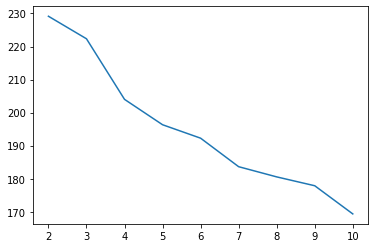

In [170]:
plt.plot(nb_clusters, ch_sc) 

Kmean


In [171]:
print(silhouette_score(X, y_km))
print(calinski_harabaz_score(X, y_km))
print(homogeneity_score(y, y_km))
print(completeness_score(y, y_km))
print(adjusted_rand_score(y, y_km))

0.1892150187238989
177.83897026482109
0.6939392703161892
0.7523570761115655
0.5991684019731661


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


DBSCAN

In [172]:
print(silhouette_score(X, Yp_dbs))
print(calinski_harabaz_score(X, Yp_dbs))
print(homogeneity_score(y, Yp_dbs))
print(completeness_score(y, Yp_dbs))
print(adjusted_rand_score(y, Yp_dbs))

0.08741932083233113
71.32647106837487
0.8184765709392535
0.7314121216307984
0.6139226006157167


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


SpectralClustering

In [173]:
print(silhouette_score(X, Ys))
print(calinski_harabaz_score(X, Ys))
print(homogeneity_score(y, Ys))
print(completeness_score(y, Ys))
print(adjusted_rand_score(y, Ys))

0.16893653941221992
154.77960485241596
0.8259913181142817
0.9168482179291366
0.7437012641619926


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


AgglomerativeClustering

In [174]:
print(silhouette_score(X, Y_ac))
print(calinski_harabaz_score(X, Y_ac))
print(homogeneity_score(y, Y_ac))
print(completeness_score(y, Y_ac))
print(adjusted_rand_score(y, Y_ac))

0.11378173759722789
118.82114071964199
0.5409008502779501
0.6196809854043795
0.39058840632003455


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
